<a href="https://colab.research.google.com/github/Vedarham/XLearnings01/blob/main/Understanding_Data_and_Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data**

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("brendan45774/test-file")

print("Path to dataset files:", path)
print(os.listdir(path) )

Using Colab cache for faster access to the 'test-file' dataset.
Path to dataset files: /kaggle/input/test-file
['tested.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "tested.csv"))

In [ ]:
df.shape

(418, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
108,1000,0,3,"Willer, Mr. Aaron (Abi Weller"")""",male,NaN,0,0,3410,8.7125,NaN,S
292,1184,0,3,"Nasr, Mr. Mustafa",male,NaN,0,0,2652,7.2292,NaN,C
220,1112,1,2,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
54,946,0,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


`isnull().sum()` can be used to check total missing values in datset, if any

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
subdf= df.drop(columns=['Name','Sex','Cabin','Embarked','Ticket'])
subdf.corr()['Survived']

,Survived
PassengerId,-0.023245
Survived,1.000000
Pclass,-0.108615
Age,-0.000013
SibSp,0.099943
Parch,0.159120
Fare,0.191514


# **EDA**
#### **Univariate Analysis**

**1. Categorical Data**

Frequency in a category

In [ ]:
import seaborn as sns

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,266
1,152


<Axes: xlabel='Survived', ylabel='count'>

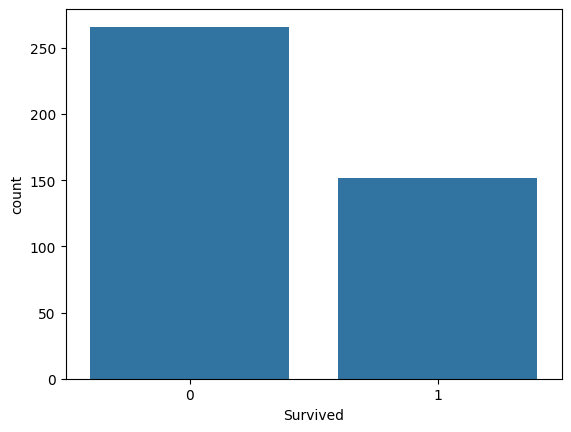

In [ ]:
sns.countplot(x = df['Survived'])

<Axes: xlabel='Pclass'>

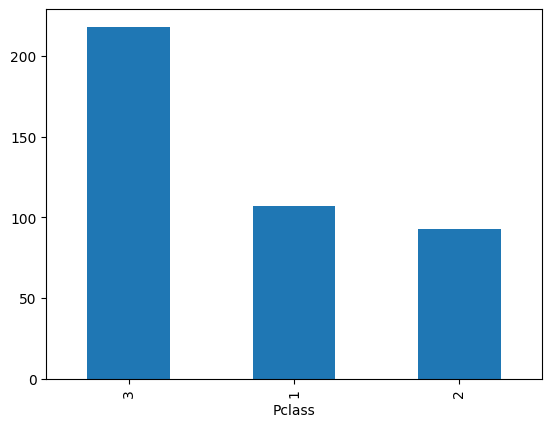

In [ ]:
df['Pclass'].value_counts().plot(kind = 'bar')

Percentage in a Category

<Axes: ylabel='count'>

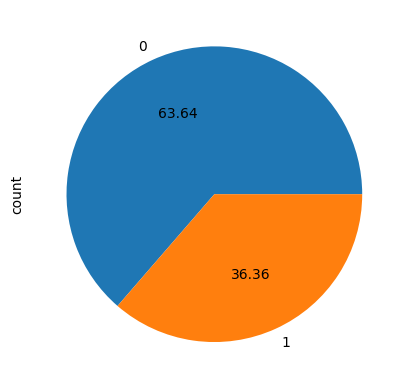

In [ ]:
df['Survived'].value_counts().plot(kind = 'pie',autopct = '%.2f')

<Axes: ylabel='count'>

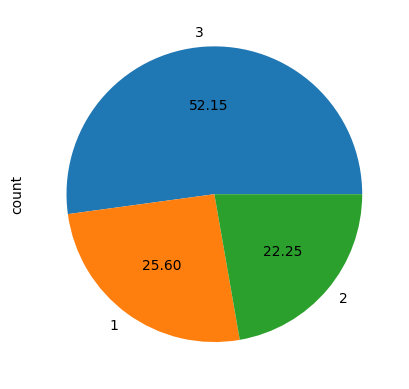

In [ ]:
df['Pclass'].value_counts().plot(kind = 'pie',autopct = '%.2f')

**2. Numerical Data**

In [ ]:
import matplotlib.pyplot as plt

(array([ 32., 168.,  80.,  42.,  10.]),
 array([ 0.17 , 15.336, 30.502, 45.668, 60.834, 76.   ]),
 <BarContainer object of 5 artists>)

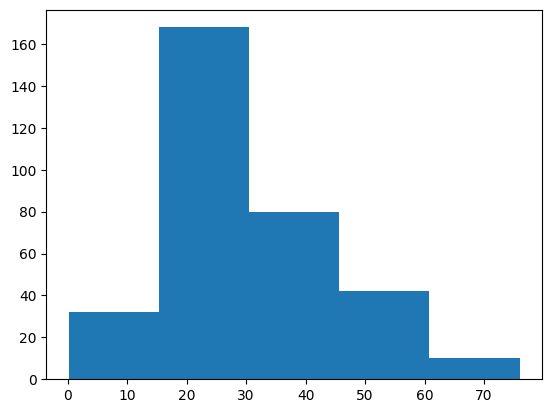

In [ ]:
plt.hist(df['Age'],bins=5)

/tmp/ipython-input-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

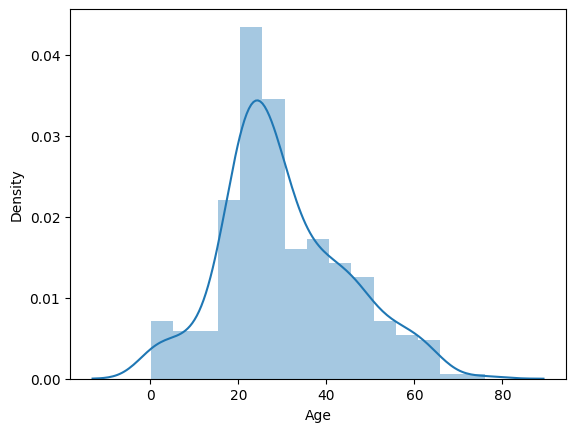

In [ ]:
sns.distplot(df['Age'])

<Axes: xlabel='Age'>

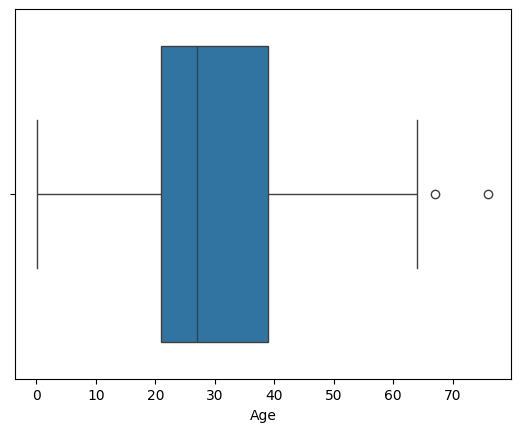

In [ ]:
sns.boxplot(x= df['Age'])